<a href="https://colab.research.google.com/github/taishi-i/nagisa_bert/blob/develop/notebooks/embedding_visualization_japanese_bert_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERTの埋め込み空間の可視化

このノートブックでは、BERTの埋め込み空間の可視化を行います。
可視化を行うことで、各モデルの特徴を調査することができます。

コードは、[BERTの埋め込み空間の可視化を最速で](https://zenn.dev/hpp/articles/d347bcb7ed0fc0)の記事を、参考に実装しています。

## ライブラリのインストール

In [ ]:
!pip install nagisa_bert # taishi-i/nagisa_bert
!pip install fugashi
!pip install ipadic # cl-tohoku/bert-base-japanese-whole-word-masking
!pip install unidic-lite # cl-tohoku/bert-base-japanese-v2

## ライブラリのインポート

In [ ]:
from sklearn.manifold import TSNE

from transformers import AutoModel
from nagisa_bert import NagisaBertTokenizer
from transformers import BertJapaneseTokenizer

## 利用する言語モデル（BERTモデルの種類）の指定

In [ ]:
model_name = "taishi-i/nagisa_bert"
# model_name = "cl-tohoku/bert-base-japanese-whole-word-masking"
# model_name = "cl-tohoku/bert-base-japanese-v2"

if model_name == "taishi-i/nagisa_bert":
    tokenizer = NagisaBertTokenizer.from_pretrained(model_name)
else:
    tokenizer = BertJapaneseTokenizer.from_pretrained(model_name) 

model = AutoModel.from_pretrained(model_name)

## 可視化対象とするトークンの選択

ここでは、文字数の多いトークンを順に3000件選びます。
サブワードとなるトークンは対象とします。

In [ ]:
NUM_WORDS = 3000

token_embeddings = model.get_input_embeddings().weight.clone()
vocab = tokenizer.get_vocab()

vectors = {}
words = []
for word, idx in sorted(vocab.items(), key=lambda x: len(x[0]), reverse=True):
    if "##" not in word:
        words.append(word)
        vectors[idx] = token_embeddings[idx].detach().numpy().copy()
        if len(vectors) > NUM_WORDS:
            break

## TSNEによる次元圧縮

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(list(vectors.values()))

## 埋め込み空間の可視化

In [ ]:
import holoviews as hv
from holoviews import opts

hv.extension('plotly')

points = hv.Points(reduced_vectors)

labels = hv.Labels(
    {('x', 'y'): reduced_vectors, 'text': [token for token, _ in zip(words, reduced_vectors)]}, 
    ['x', 'y'], 
    'text'
)

(points * labels).opts(
    opts.Labels(xoffset=0.05, yoffset=0.05, size=14, padding=0.2, width=1000, height=1000),
    opts.Points(color='black', marker='x', size=3),
)

## nagisa_bert の埋め込み空間の可視化
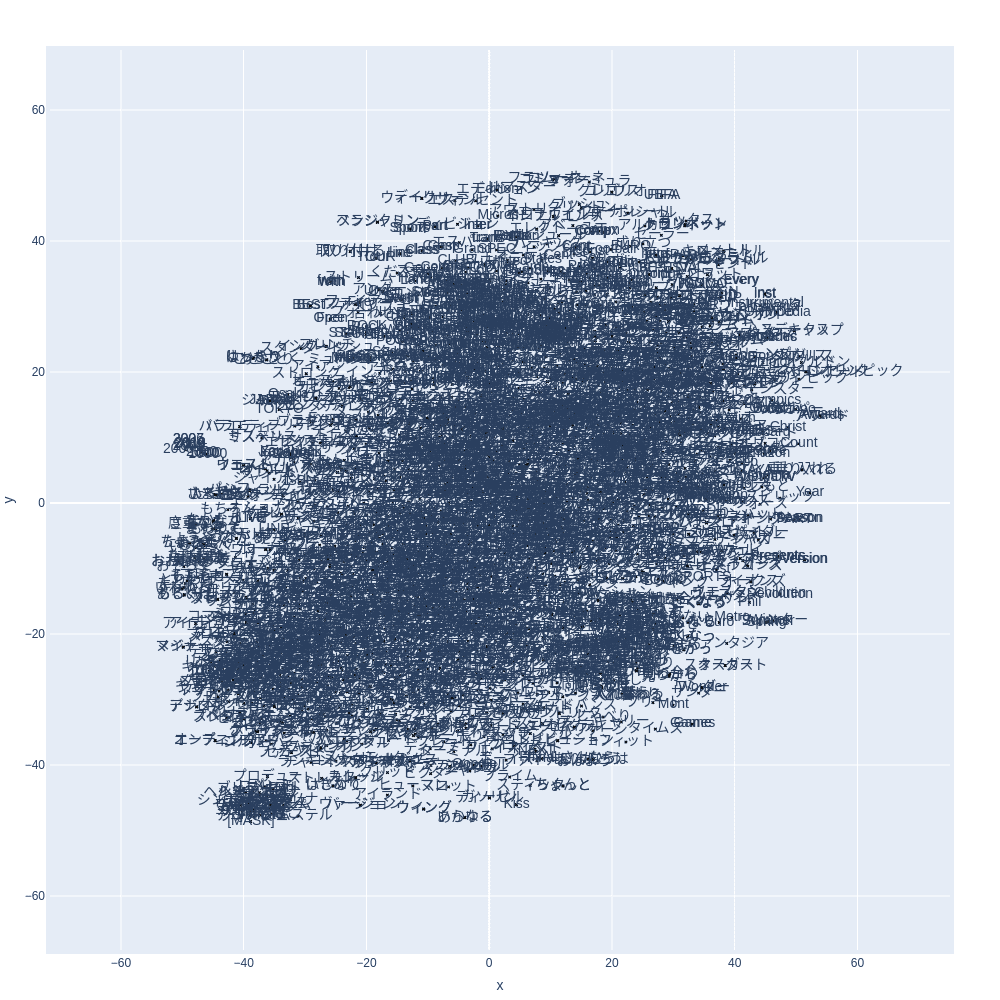